#### Imports

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from catboost import CatBoostClassifier, Pool 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


#### Read in Dataset

In [2]:
dogs = pd.read_csv('../data/dogs.csv')

#### Feature Selection

In [3]:
dogs = dogs.dropna(subset=['outcome_type', 'intake_sex'])

In [4]:
features = [
    'intake_type',
    'intake_condition',
    'intake_sex',
    'intake_spay_neuter',
    'intake_age_in_years',
    'breed',
    'color',
    'found_city',
]

target = ['outcome_type']

In [5]:
dogs = dogs[
            (dogs['outcome_type'].isin(['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia'])) &
            (dogs['intake_condition'] == 'Normal')
            ]

In [6]:
X = dogs[features]
y = dogs[target]

In [7]:
y['outcome_type'].value_counts()

Adoption           31392
Return to Owner    18277
Transfer           13037
Euthanasia          1028
Name: outcome_type, dtype: int64

In [8]:
#Combining Adoption since Transfers are initiated to increase liklihood of adoption

y = y['outcome_type'].str.replace('Adoption', 'Other')

In [10]:
y.value_counts()

Other              31392
Return to Owner    18277
Transfer           13037
Euthanasia          1028
Name: outcome_type, dtype: int64

In [12]:
y = y.str.replace('Transfer', 'Other')
y = y.str.replace('Euthanasia', 'Other')

In [13]:
y.value_counts()

Other              45457
Return to Owner    18277
Name: outcome_type, dtype: int64

In [14]:
#CatBoost requires the specification of categorical columns. This function gets the list of categorical indicies

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

categorical_indicies = get_categorical_indicies(X)

In [15]:
categorical_indicies

[0, 1, 2, 3, 5, 6, 7]

In [16]:
#CatBoost needs the categorical columns to be converted to the categorical datatype

def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')

convert_cats(X)

<ipython-input-16-6025a30c5164>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


#### Train, Test, Split and Pooling

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63)

In [18]:
train_dataset = Pool(X_train, 
                     y_train,
                     cat_features=categorical_indicies
                    )
test_dataset = Pool(X_test, 
                    y_test,
                    cat_features=categorical_indicies
                   )

#### Model Training and Prediction

In [19]:
clf = CatBoostClassifier()

clf.fit(train_dataset)

preds = clf.predict(test_dataset)

print(preds)

Learning rate set to 0.053709
0:	learn: 0.6620577	total: 88.2ms	remaining: 1m 28s
1:	learn: 0.6361997	total: 110ms	remaining: 55s
2:	learn: 0.6123644	total: 129ms	remaining: 42.9s
3:	learn: 0.5909273	total: 151ms	remaining: 37.5s
4:	learn: 0.5721665	total: 168ms	remaining: 33.5s
5:	learn: 0.5600727	total: 178ms	remaining: 29.5s
6:	learn: 0.5468306	total: 194ms	remaining: 27.6s
7:	learn: 0.5361881	total: 218ms	remaining: 27s
8:	learn: 0.5263492	total: 247ms	remaining: 27.2s
9:	learn: 0.5170396	total: 273ms	remaining: 27.1s
10:	learn: 0.5083068	total: 292ms	remaining: 26.3s
11:	learn: 0.5019083	total: 316ms	remaining: 26s
12:	learn: 0.4955534	total: 337ms	remaining: 25.6s
13:	learn: 0.4903408	total: 356ms	remaining: 25.1s
14:	learn: 0.4846213	total: 375ms	remaining: 24.6s
15:	learn: 0.4800223	total: 398ms	remaining: 24.4s
16:	learn: 0.4768649	total: 421ms	remaining: 24.4s
17:	learn: 0.4735832	total: 461ms	remaining: 25.2s
18:	learn: 0.4695871	total: 488ms	remaining: 25.2s
19:	learn: 0.46

164:	learn: 0.4239510	total: 4.05s	remaining: 20.5s
165:	learn: 0.4239174	total: 4.07s	remaining: 20.5s
166:	learn: 0.4239117	total: 4.1s	remaining: 20.5s
167:	learn: 0.4238961	total: 4.13s	remaining: 20.4s
168:	learn: 0.4238881	total: 4.14s	remaining: 20.4s
169:	learn: 0.4238703	total: 4.15s	remaining: 20.3s
170:	learn: 0.4238067	total: 4.18s	remaining: 20.3s
171:	learn: 0.4237781	total: 4.2s	remaining: 20.2s
172:	learn: 0.4237527	total: 4.23s	remaining: 20.2s
173:	learn: 0.4237339	total: 4.26s	remaining: 20.2s
174:	learn: 0.4236587	total: 4.29s	remaining: 20.2s
175:	learn: 0.4236304	total: 4.31s	remaining: 20.2s
176:	learn: 0.4235918	total: 4.34s	remaining: 20.2s
177:	learn: 0.4235348	total: 4.37s	remaining: 20.2s
178:	learn: 0.4234732	total: 4.39s	remaining: 20.1s
179:	learn: 0.4234427	total: 4.42s	remaining: 20.1s
180:	learn: 0.4234023	total: 4.44s	remaining: 20.1s
181:	learn: 0.4233536	total: 4.48s	remaining: 20.1s
182:	learn: 0.4232960	total: 4.5s	remaining: 20.1s
183:	learn: 0.4

330:	learn: 0.4181099	total: 8.35s	remaining: 16.9s
331:	learn: 0.4180371	total: 8.38s	remaining: 16.9s
332:	learn: 0.4179982	total: 8.4s	remaining: 16.8s
333:	learn: 0.4179684	total: 8.43s	remaining: 16.8s
334:	learn: 0.4179446	total: 8.45s	remaining: 16.8s
335:	learn: 0.4179243	total: 8.47s	remaining: 16.7s
336:	learn: 0.4178762	total: 8.5s	remaining: 16.7s
337:	learn: 0.4178271	total: 8.52s	remaining: 16.7s
338:	learn: 0.4178098	total: 8.54s	remaining: 16.7s
339:	learn: 0.4177966	total: 8.57s	remaining: 16.6s
340:	learn: 0.4177595	total: 8.6s	remaining: 16.6s
341:	learn: 0.4177403	total: 8.63s	remaining: 16.6s
342:	learn: 0.4177125	total: 8.65s	remaining: 16.6s
343:	learn: 0.4176884	total: 8.68s	remaining: 16.5s
344:	learn: 0.4176563	total: 8.71s	remaining: 16.5s
345:	learn: 0.4175367	total: 8.73s	remaining: 16.5s
346:	learn: 0.4175106	total: 8.75s	remaining: 16.5s
347:	learn: 0.4174909	total: 8.78s	remaining: 16.4s
348:	learn: 0.4174514	total: 8.8s	remaining: 16.4s
349:	learn: 0.41

491:	learn: 0.4130941	total: 12.4s	remaining: 12.8s
492:	learn: 0.4130852	total: 12.5s	remaining: 12.8s
493:	learn: 0.4130424	total: 12.5s	remaining: 12.8s
494:	learn: 0.4130245	total: 12.5s	remaining: 12.8s
495:	learn: 0.4129902	total: 12.6s	remaining: 12.8s
496:	learn: 0.4129760	total: 12.6s	remaining: 12.8s
497:	learn: 0.4129622	total: 12.6s	remaining: 12.8s
498:	learn: 0.4129234	total: 12.7s	remaining: 12.7s
499:	learn: 0.4129032	total: 12.7s	remaining: 12.7s
500:	learn: 0.4128698	total: 12.8s	remaining: 12.7s
501:	learn: 0.4127772	total: 12.8s	remaining: 12.7s
502:	learn: 0.4127573	total: 12.8s	remaining: 12.7s
503:	learn: 0.4127432	total: 12.8s	remaining: 12.6s
504:	learn: 0.4127112	total: 12.9s	remaining: 12.6s
505:	learn: 0.4126987	total: 12.9s	remaining: 12.6s
506:	learn: 0.4126772	total: 12.9s	remaining: 12.6s
507:	learn: 0.4126632	total: 13s	remaining: 12.5s
508:	learn: 0.4126606	total: 13s	remaining: 12.5s
509:	learn: 0.4126265	total: 13s	remaining: 12.5s
510:	learn: 0.4125

655:	learn: 0.4087885	total: 16.9s	remaining: 8.84s
656:	learn: 0.4087811	total: 16.9s	remaining: 8.81s
657:	learn: 0.4087375	total: 16.9s	remaining: 8.79s
658:	learn: 0.4086789	total: 16.9s	remaining: 8.77s
659:	learn: 0.4086521	total: 17s	remaining: 8.74s
660:	learn: 0.4086212	total: 17s	remaining: 8.72s
661:	learn: 0.4086028	total: 17s	remaining: 8.69s
662:	learn: 0.4085557	total: 17s	remaining: 8.66s
663:	learn: 0.4085440	total: 17.1s	remaining: 8.63s
664:	learn: 0.4084956	total: 17.1s	remaining: 8.61s
665:	learn: 0.4084644	total: 17.1s	remaining: 8.58s
666:	learn: 0.4084473	total: 17.1s	remaining: 8.55s
667:	learn: 0.4084120	total: 17.2s	remaining: 8.53s
668:	learn: 0.4084043	total: 17.2s	remaining: 8.5s
669:	learn: 0.4083965	total: 17.2s	remaining: 8.47s
670:	learn: 0.4083556	total: 17.2s	remaining: 8.45s
671:	learn: 0.4083522	total: 17.3s	remaining: 8.43s
672:	learn: 0.4083362	total: 17.3s	remaining: 8.41s
673:	learn: 0.4082911	total: 17.3s	remaining: 8.39s
674:	learn: 0.4082581

816:	learn: 0.4044144	total: 21.1s	remaining: 4.73s
817:	learn: 0.4044005	total: 21.1s	remaining: 4.7s
818:	learn: 0.4043752	total: 21.2s	remaining: 4.68s
819:	learn: 0.4043376	total: 21.2s	remaining: 4.65s
820:	learn: 0.4043212	total: 21.2s	remaining: 4.63s
821:	learn: 0.4042901	total: 21.3s	remaining: 4.6s
822:	learn: 0.4042700	total: 21.3s	remaining: 4.58s
823:	learn: 0.4042661	total: 21.3s	remaining: 4.55s
824:	learn: 0.4042547	total: 21.3s	remaining: 4.52s
825:	learn: 0.4042397	total: 21.3s	remaining: 4.5s
826:	learn: 0.4042386	total: 21.4s	remaining: 4.47s
827:	learn: 0.4042235	total: 21.4s	remaining: 4.45s
828:	learn: 0.4041836	total: 21.4s	remaining: 4.42s
829:	learn: 0.4041725	total: 21.4s	remaining: 4.39s
830:	learn: 0.4041612	total: 21.5s	remaining: 4.37s
831:	learn: 0.4041148	total: 21.5s	remaining: 4.34s
832:	learn: 0.4040693	total: 21.5s	remaining: 4.31s
833:	learn: 0.4040477	total: 21.5s	remaining: 4.29s
834:	learn: 0.4040238	total: 21.6s	remaining: 4.26s
835:	learn: 0.4

979:	learn: 0.4007214	total: 25.4s	remaining: 518ms
980:	learn: 0.4006885	total: 25.4s	remaining: 492ms
981:	learn: 0.4006470	total: 25.4s	remaining: 466ms
982:	learn: 0.4006212	total: 25.5s	remaining: 440ms
983:	learn: 0.4006113	total: 25.5s	remaining: 414ms
984:	learn: 0.4005595	total: 25.5s	remaining: 388ms
985:	learn: 0.4005534	total: 25.5s	remaining: 362ms
986:	learn: 0.4005337	total: 25.5s	remaining: 336ms
987:	learn: 0.4004968	total: 25.6s	remaining: 310ms
988:	learn: 0.4004922	total: 25.6s	remaining: 285ms
989:	learn: 0.4004697	total: 25.6s	remaining: 259ms
990:	learn: 0.4004300	total: 25.6s	remaining: 233ms
991:	learn: 0.4004143	total: 25.7s	remaining: 207ms
992:	learn: 0.4004128	total: 25.7s	remaining: 181ms
993:	learn: 0.4003665	total: 25.8s	remaining: 155ms
994:	learn: 0.4003483	total: 25.8s	remaining: 130ms
995:	learn: 0.4003302	total: 25.8s	remaining: 104ms
996:	learn: 0.4002977	total: 25.8s	remaining: 77.8ms
997:	learn: 0.4002738	total: 25.9s	remaining: 51.9ms
998:	learn

#### Model Performance

In [20]:
print(classification_report(y_test, preds))

                 precision    recall  f1-score   support

          Other       0.84      0.88      0.86     11317
Return to Owner       0.68      0.60      0.63      4617

       accuracy                           0.80     15934
      macro avg       0.76      0.74      0.75     15934
   weighted avg       0.80      0.80      0.80     15934



In [21]:
print(confusion_matrix(y_test, preds))

[[10009  1308]
 [ 1864  2753]]


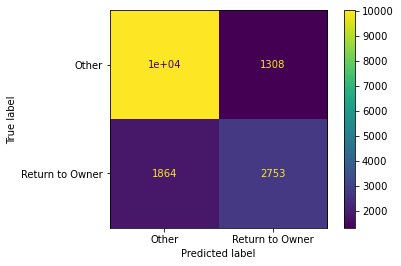

In [22]:
plot_confusion_matrix(clf, X_test, y_test);

In [23]:
clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,intake_age_in_years,25.163381
1,intake_type,22.244872
2,breed,15.740250
3,intake_spay_neuter,12.703290
4,color,9.723532
5,found_city,8.270877
6,intake_sex,6.153797
7,intake_condition,0.000000
